# Segmentação de clientes

**Desenvolvedores** <br>
Fabio Gustavo Gomes Vaz | RA: 00282997 <br>
Felipe Fernandes Rojas | RA: 00282999 <p>

**Professor orientador** <br>
Rooney Ribeiro Albuquerque Coelho <p>

**Projeto final da disciplina de Mineração de Dados do curso de Ciência de Dados e Inteligência Artificial pela PUC-SP.**

## Objetivo

O intuito deste projeto é aplicar a segmentação de clientes a esse conjunto de dados históricos. Esta prática consiste em particionar uma base de clientes em grupos de indivíduos com características semelhantes. É uma estratégia significativa, pois uma organização pode ter esses grupos específicos como alvo de clientes e alocar recursos de marketing de forma eficaz. Por exemplo, um grupo pode conter clientes de alto lucro e baixo risco, ou seja, mais propensos a comprar produtos ou assinar um serviço. Uma tarefa empresarial é reter esses clientes.

## Metodologia

A partir do tratamento, da manipulação e da análise de dados com as bibliotecas *pandas* e *matplotlib*, serão desenvolvidos gráficos para extrairmos informações relevantes dos indivíduos contidos neste conjunto. Após, usaremos uma técnica de aprendizado de máquina não supervisionado (*k-means*) para que os indivíduos sejam agrupados conforme seus atributos sejam similares e haja a menor diferença possível entre eles, ao mesmo passo que a quantidade de grupos não seja excessiva e viabilize a criação de boas estratégias de marketing personalizadas.

## Processo de automatização

Seção onde os métodos são declarados, nomeados, explicados e armazenados.

In [ ]:
import pandas as pd # para visualização, manipulação e análise de dados

def criar_dataframe(endereco, delimitador):
  """ Função que lê arquivo em .csv com a biblioteca pandas e o armazena na variável desejável.

      endereço: inserir string do local em que o arquivo está armazenado;
      delimitador: inserir string do delimitador deste arquivo .csv;
  """
  return pd.read_csv(endereco, delimiter=delimitador)

In [ ]:
import matplotlib.pyplot as plt # para criação de gráficos

def histogramar(dataframe, atributo, tamanho, eixo=None, titulo=None, cor=None):
  """ Função que desenvolve um gráfico de histograma com base na frequência de valores de um atributo específico em um dataframe.

      dataframe: inserir variável contendo o nome do DataFrame;
      atributo: inserir string com o nome da coluna do DataFrame a ter a frequência de valores contada;
      tamanho: inserir tupla referente ao tamanho desejado do gráfico;
      estilo (opcional): inserir string contendo o estilo desejado para o gráfico. Por padrão, 'ggplot';
      eixo (opcional): inserir string com o nome do eixo desejado no gráfico; 
      título (opcional): inserir string com o nome do título desejado do gráfico;
      cor (opcional): inserir string com o nome da cor desejada no gráfico.
  """
  # Estilo
  plt.style.use('ggplot')
  # Tamanho
  plt.figure(figsize = tamanho)
  # Título
  plt.title(titulo)

  # Plotagem do gráfico conforme o atributo desejado
  plt.hist(dataframe[atributo], ec='k', alpha=.8, color=cor, align='mid')
  # Nomeação do eixo
  plt.xlabel(eixo)

  # Mostrar o gráfico
  plt.show()

In [ ]:
def soma_quadratica_erro(dataframe, grupos, conjunto_padronizado, tamanho, estilo='ggplot', inicio_busca=1, fim_busca=10):
  """ Função que gera um gráfico da soma quadrática do erro, ou seja, a perda de similaridade entre os indivíduos 
  conforme a quantidade de grupos de clusterização escolhida para o conjunto de dados.

      dataframe: inserir variável contendo o nome do dataframe;
      grupos: inserir string contendo o nome da coluna a qual pertence o grupo das instâncias;
      conjunto_padronizado: inserir variável contendo o conjunto de dados padronizados;
      tamanho: inserir tupla com o tamanho desejado para o gráfico;
      estilo (opcional): inserir string contendo o estilo desejado para o gráfico. Por padrão, 'ggplot';
      inicio_busca (opcional): inserir número inteiro com o início da busca do algoritmo. Por padrão, 1;
      fim_busca (opcional): inserir número inteiro com o fim da busca do algoritmo. Por padrão, 10.
  """

  # Dicionário para armazenamento da soma quadrática do erro
  sse = {}

  # Estrutura de repetição, para que o algoritmo calcule o erro para cada quantidade de grupos desejada
  for k in range(inicio_busca, fim_busca+1):
      kmeans = KMeans(n_clusters=k, max_iter=1000).fit(conjunto_padronizado)
      dataframe[grupos] = kmeans.labels_
      sse[k] = kmeans.inertia_

  # Estilo do gráfico
  plt.style.use(estilo)
  # Tamanho do gráfico
  plt.figure(figsize = tamanho)

  # Criação do gráfico com as chaves e os valores do dicionário da soma quadrática do erro
  plt.plot(list(sse.keys()), list(sse.values()))

  # Eixos e título
  plt.xlabel('Quantidade de grupos')
  plt.ylabel('Perda de similaridade')
  plt.title('Soma quadrática do erro')

  # Mostrar o gráfico
  plt.show()

In [ ]:
def barras(dataframe, atributo, titulo, eixo, tamanho, cor=None):
  """ Função que desenvolve um gráfico de barras de um atributo para análise do agrupamento.
      dataframe: inserir variável contendo o nome do DataFrame;
      atributo: inserir string com o nome da coluna do DataFrame a ter a frequência de valores contada;
      titulo: inserir string contendo o título do gráfico;
      eixo: inserir string contendo o nome do eixo desejado;
      tamanho: inserir tupla contendo o tamanho do gráfico desejado;
      cor (opcional): inserir string contendo a cor desejada das barras do gráfico.
  """
  # Estilo
  plt.style.use('ggplot')
  # Tamanho
  plt.figure(figsize = tamanho)
  # Título
  plt.title(titulo)

  # Criação do gráfico de barras com a indexação do dataframe sendo a identificação do grupo e o atributo desejado sendo a medida da barra
  plt.bar(dataframe.index, dataframe[atributo], color=cor, alpha=.8)

  # Denominação dos eixos
  plt.xlabel('Grupo')
  plt.ylabel(eixo)
  plt.xticks(dataframe.index)

  # Mostrar o gráfico
  plt.show()

## Código

Seção destinada a demonstração dos códigos de programação e seus resultados.

### Leitura e tratamento do conjunto de dados

In [ ]:
# Uso da função 'criar_dataframe' para a leitura do conjunto de dados

dados = '/content/dados.csv'
df = criar_dataframe(dados, ',')

In [ ]:
# Uso do método 'info' para extrairmos informações para o tratamento do conjunto de dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          850 non-null    int64  
 1   ID do cliente       850 non-null    int64  
 2   Idade               850 non-null    int64  
 3   Educação            850 non-null    int64  
 4   Anos de emprego     850 non-null    int64  
 5   Renda               850 non-null    int64  
 6   Dívida do cartão    850 non-null    float64
 7   Outras dívidas      850 non-null    float64
 8   Inadimplente        700 non-null    float64
 9   Razão débito-renda  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [ ]:
# Conforme análise, optou-se por remover as instâncias em que os atributos não estão completos, por meio do método 'dropna'

df = df.dropna()

### Demonstração gráfica

A partir do histograma abaixo, observa-se que a gama de clientes tem de 20 a 56 anos, sendo a maior parte indivíduos de 30 a 40 anos de idade.

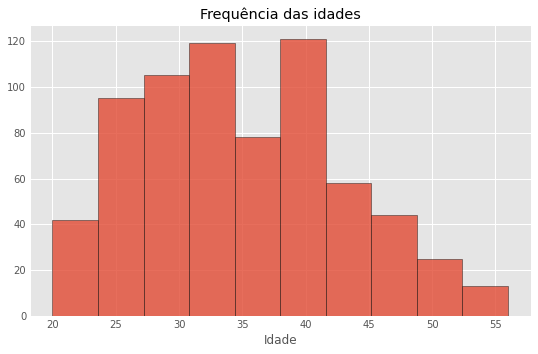

In [ ]:
# Desenvolvimento de um histograma das idades dos indivíduos com o uso da função 'histogramar'

tamanho = (8,5)
eixo = 'Idade'
titulo = 'Frequência das idades'

histogramar(df, 'Idade', tamanho, eixo, titulo)

### Análise da adimplência

In [ ]:
# Valores presentes na coluna 'Inadimplente'

df['Inadimplente'].unique()

array([0., 1.])

In [ ]:
# Contagem de indivíduos adimplentes e inadimplentes

In = len(df.query('Inadimplente == 0'))
Ad = len(df.query('Inadimplente == 1'))

In [ ]:
# Estrutura de arredondamento percentual para a visualização da proporção de adimplência e inadimplência entre os indivíduos

print(f'Adimplente:   {round(In/(Ad+In)*100,2)} %\nInadimplente: {round(Ad/(Ad+In)*100,2)} %')

Adimplente:   73.86 %
Inadimplente: 26.14 %


### Modelo de agrupamento

In [ ]:
from sklearn.preprocessing import StandardScaler # para padronizar uma escala em um conjunto de dados

# Definição da variável 'X' para remover colunas indesejadas na modelagem de dados (clusterização)
X = df.drop(['Unnamed: 0','ID do cliente'],axis=1)

# Padronizador e criação da variável 'X_std' para armazenar os dados padronizados
padronizador = StandardScaler()
X_std = padronizador.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans # para criar um modelo de clusterização

# Criação do modelo, com a divisão em quatro grupos o mais similares possível
modelo = KMeans(n_clusters=4, n_init=50)
modelo.fit(X_std)

KMeans(n_clusters=4, n_init=50)

In [ ]:
# Utilização do método 'predict' para que o modelo prediga o grupo de cada indivíduo, com um array armazenado na variável 'agrupamento'

agrupamento = modelo.predict(X_std)

In [ ]:
# Criação de uma coluna chamada 'Grupo' dentro do conjunto de dados inicial, com base nas predições do modelo

df['Grupo'] = agrupamento

#### Avaliação do modelo

Conforme o método Elbow, que consiste em uma das formas usadas para descobrir a quantidade ideal de grupos para o conjunto de dados: quando a diferença entre a distância é quase insignificante temos o valor ótimo de k. Nota-se que na visualização abaixo esse valor seria igual a 4.

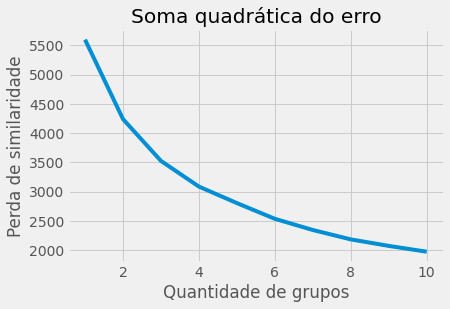

In [ ]:
# Gráfico para a avaliação do modelo, com a semelhança entre os indivíduos de cada grupo em função da quantidade de grupos

tamanho = (6,4)

soma_quadratica_erro(df, 'Grupo', X_std, tamanho, estilo='fivethirtyeight')

#### Análise dos grupos preditos

In [ ]:
# Conjunto de dados para descrever as características de cada grupo definido pelo modelo, com os métodos 'groupby' e 'mean'

df_descritivo = df.drop(columns=['Unnamed: 0'	,'ID do cliente']).groupby('Grupo').mean()
df_descritivo

,Idade,Educação,Anos de emprego,Renda,Dívida do cartão,Outras dívidas,Inadimplente,Razão débito-renda
Grupo,,,,,,,,
0,39.975610,1.252033,7.918699,37.430894,1.217927,2.495081,0.016260,9.906504
1,42.606383,2.085106,16.840426,103.478723,4.828883,9.160117,0.265957,15.993617
2,31.295597,1.861635,3.773585,30.257862,1.484371,2.688943,0.974843,13.970440
3,32.419753,1.728395,8.379630,39.441358,0.764694,1.682867,0.003086,6.911111


#### Demonstração gráfica

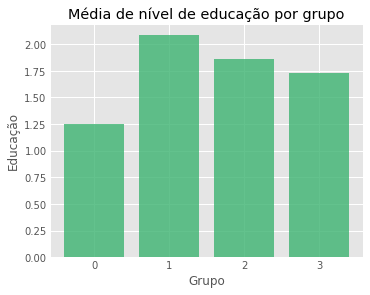

In [ ]:
titulo = 'Média de nível de educação por grupo'
eixo = 'Educação'
tamanho = (5,4)
cor = 'mediumseagreen'

barras(df_descritivo, 'Educação', titulo, eixo, tamanho, cor)

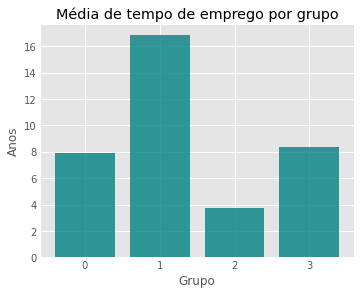

In [ ]:
titulo = 'Média de tempo de emprego por grupo'
eixo = 'Anos'
tamanho = (5,4)
cor = 'teal'

barras(df_descritivo, 'Anos de emprego', titulo, eixo, tamanho, cor)

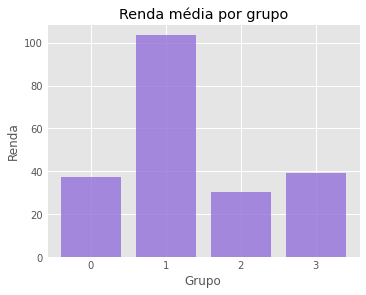

In [ ]:
titulo = 'Renda média por grupo'
eixo = 'Renda'
tamanho = (5,4)
cor = 'mediumpurple'

barras(df_descritivo, 'Renda', titulo, eixo, tamanho, cor)

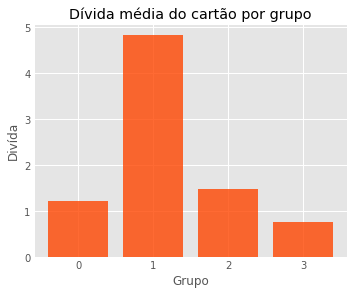

In [ ]:
titulo = 'Dívida média do cartão por grupo'
eixo = 'Divída'
tamanho = (5,4)
cor = 'orangered'

barras(df_descritivo, 'Dívida do cartão', titulo, eixo, tamanho, cor)

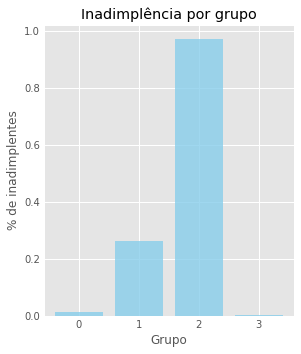

In [ ]:
titulo = 'Inadimplência por grupo'
eixo = '% de inadimplentes'
tamanho = (4,5)
cor = 'skyblue'

barras(df_descritivo, 'Inadimplente', titulo, eixo, tamanho, cor)

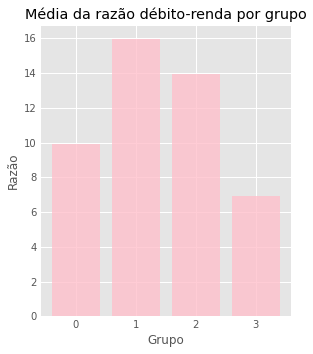

In [ ]:
titulo = 'Média da razão débito-renda por grupo'
eixo = 'Razão'
tamanho = (4,5)
cor = 'pink'

barras(df_descritivo, 'Razão débito-renda', titulo, eixo, tamanho, cor)

## Conclusão

O algoritmo de aprendizagem de máquina não supervisionada foi excelente para definição de grupos que segmentam os clientes da base de dados escolhida. <p>
Formaram-se quatro grupos: <br>
**Grupo 0**: é um grupo com o menor nível de educação, com empregos consolidados, renda na média, divída do cartão na média e inadimplência quase nula; <br>
**Grupo 1**: é um grupo mais velho, com o maior nível de educação, com empregos super consolidados, as maiores rendas, as maiores dívidas no cartão, a maior razão débito-renda, mas ainda há alguma inadimplência; <br>
**Grupo 2**: é um grupo mais novo, com o segundo maior nível de educação, ainda sem emprego consolidado, com a menor renda e em grande maioria inadimplente; <br>
**Grupo 3**: é um grupo novo, com educação na média, com empregos consolidados, boa renda, menores dívidas no cartão, praticamente nenhuma inadimplência e a menor razão débito-renda.